# Mini Batch Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from sklearn.preprocessing import StandardScaler

##### Load the dataset in pandas dataframe


In [2]:
df = pd.read_csv("../../Datasets/Property.csv")
df.sample(5)

,area,bedrooms,price
19,800,1,32
0,1056,2,39
17,1540,3,60
2,1440,3,62
9,3700,5,167


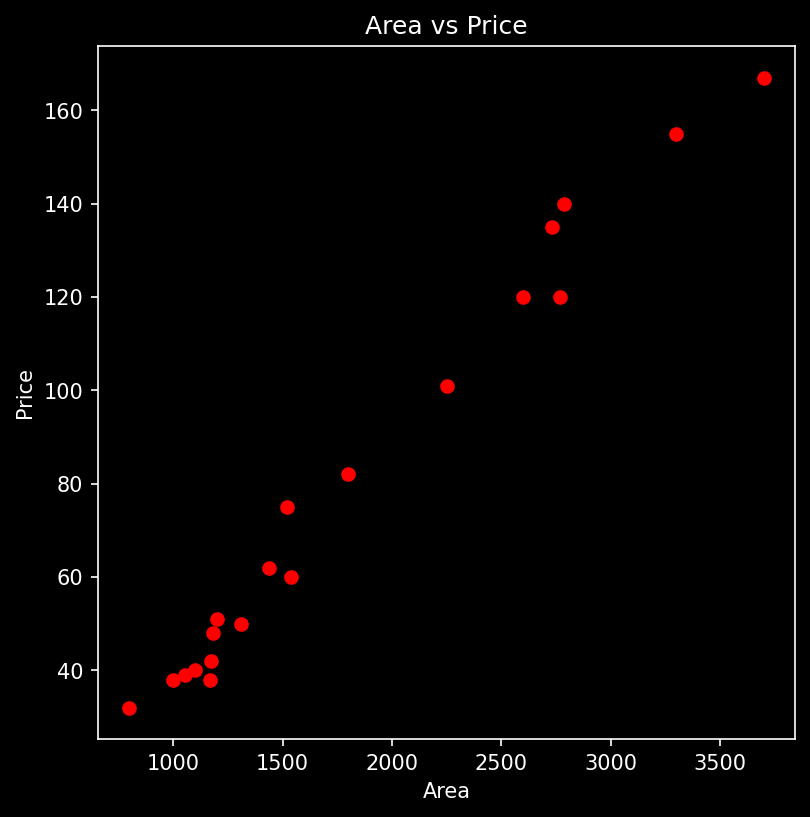

In [3]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
area = df["area"]
price = df["price"]
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.scatter(area, price, c="red", marker=MarkerStyle("o"))
plt.savefig("Images/area_vs_price.png", bbox_inches="tight")

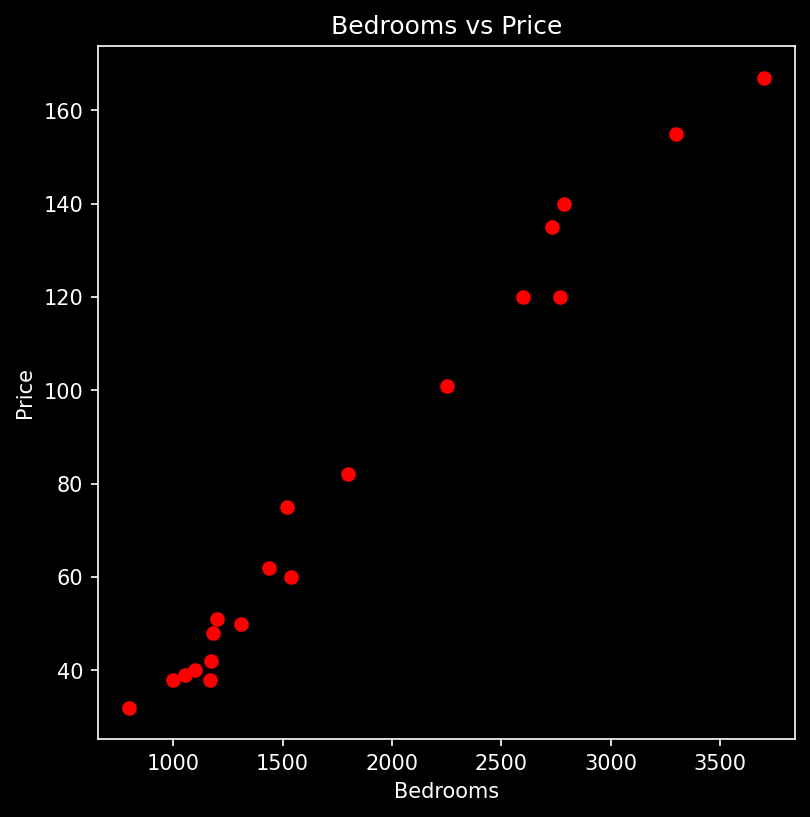

In [4]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
bedrooms = df["bedrooms"]
price = df["price"]
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.scatter(area, price, c="red", marker=MarkerStyle("o"))
plt.savefig("Images/bedrooms_vs_price.png", bbox_inches="tight")

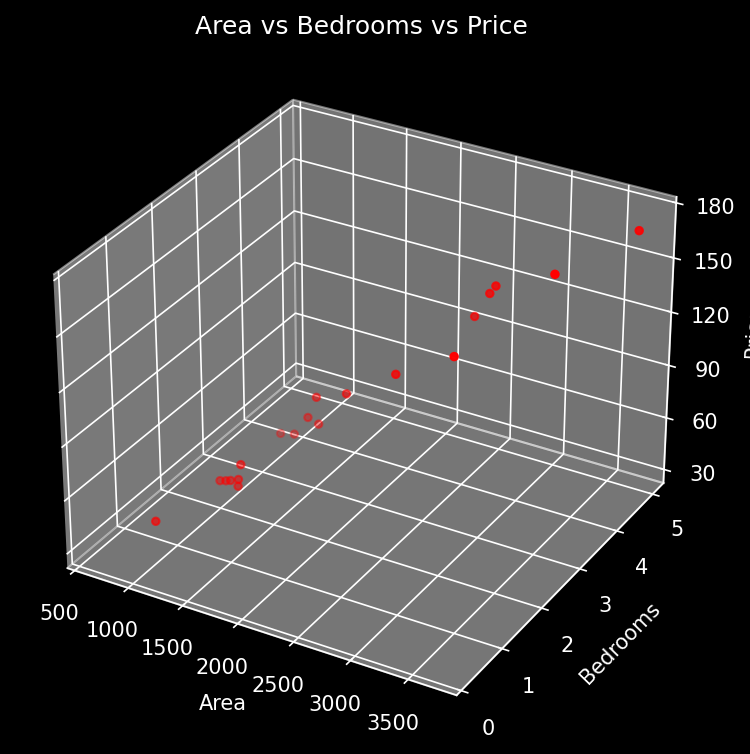

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ax = fig.add_subplot(111, projection="3d")
ax.scatter(area, bedrooms, price, color="red", marker=MarkerStyle("."), s=50)
ax.set_xticks(np.arange(500, 4000, 500))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_zticks(np.arange(30, 200, 30))
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Area vs Bedrooms vs Price")
plt.savefig("Images/area_vs_bedrooms_vs_price.png", bbox_inches="tight")

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
def mini_batch_gradient_descent(
    x, y_true, epochs=1000, batch_size=5, learning_rate=0.01
):
    number_of_features = x.shape[1]  # our case number_of_features = 2 (area, bedroom)
    w = np.ones(number_of_features)  # initialize weights to 1
    b = 0  # initialize bias to 0
    total_samples = x.shape[0]  # number of rows in x
    if (
        batch_size > total_samples
    ):  # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    cost_list = []
    epoch_list = []
    cost = None  # initialize cost to None

    for epoch in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0, total_samples, batch_size):
            Xj = X_tmp[j : j + batch_size]
            yj = y_tmp[j : j + batch_size]
            y_predicted = w @ Xj.T + b
            error = yj - y_predicted
            w_grad = -(2 / batch_size) * (error @ Xj)
            b_grad = -(2 / batch_size) * np.sum(error)
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad
            cost = np.sum(error**2) / batch_size
        if epoch % 50 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X, y)
w, b, cost

(array([40.68727681,  2.53696596]), 79.75919795571143, 2.1595199602211634)

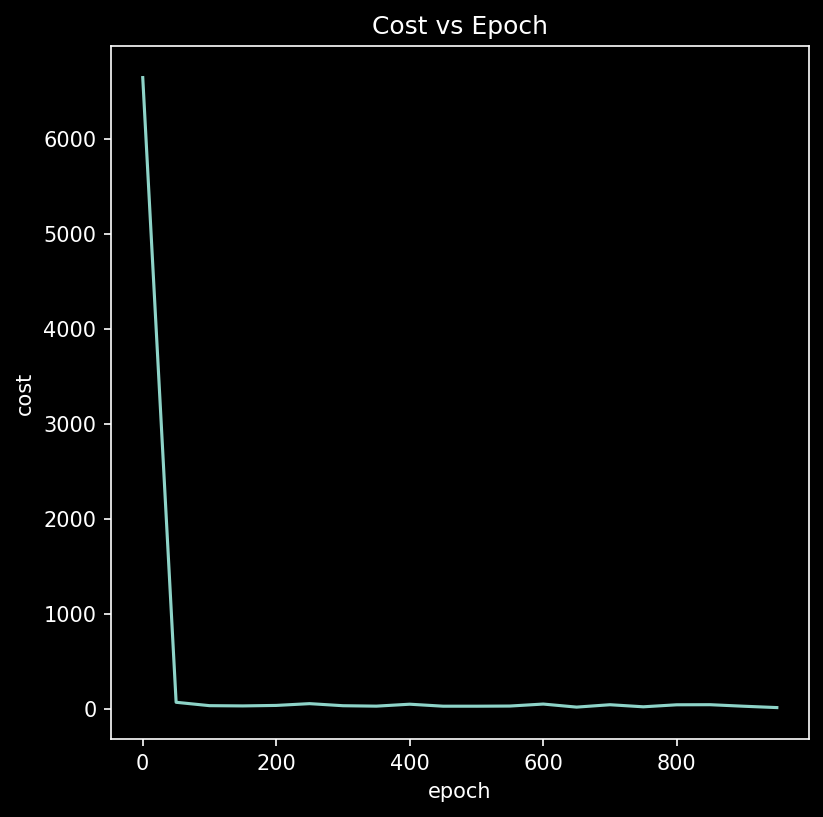

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.plot(epoch_list, cost_list)
plt.savefig("Images/cost_vs_epoch_MBGD.png", bbox_inches="tight")

In [10]:
def predict(x):
    scaled_x = scaler.fit_transform(x)
    y_pred = w @ scaled_x.T + b
    return y_pred

In [11]:
predict(X)

array([ 40.38246708, 120.30624185,  61.61143862,  65.52217621,
        47.33488946,  45.88646813, 126.67929569, 154.10273951,
        55.3349462 , 176.10420242,  78.99249456, 129.23817337,
        37.67874727,  42.50681836, 100.71881448,  46.12787168,
        49.05845378,  66.43950972, 125.82478417,  25.33342654])